# Parsowanie danych wejściowych

## Rozdzielenie populacji C1 i C2 na podstawie wartości parametru C



In [1]:
population_data = open("211968.txt").read().strip().split("\n")

In [2]:
c1 = []
c2 = []

for line in population_data:
    valX, valC = line.split()
    valX = float(valX)
    valC = int(float(valC))
    
    T = c2 if valC != 1 else c1
    T.append(valX)

## Odczytanie danych definiujących dodatkowe założenia

In [3]:
additional_data = open("211968.info").read().strip().split("\n")
additional_data

['Alfa = 0.01', 'Rozkład jednostronny']

# Histogram prezentujący zróżnicowanie cechy X pośród populacji C1 i C2

([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,
          2.,  4.,  2.,  4.,  4.,  6., 11., 10.,  8.,  7.,  8., 16., 19.,
          9., 22., 21., 11., 16., 13., 23., 12., 13., 11., 18., 17., 22.,
         14.,  9.,  9.,  7.,  9.,  8.,  6.,  5.,  3.,  0.,  2.,  1.,  0.,
          1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  3.,  1.,  0.,  3.,  3.,
          1.,  4.,  3.,  7.,  3.,  2.,  6.,  2.,  2.,  2.,  8.,  8.,  4.,
          8.,  9.,  9.,  6.,  7.,  8.,  7., 10., 12., 10., 11., 15.,  9.,
         12., 12., 12., 18.,  9., 19., 18., 18., 13., 13., 14.,  8.,  9.,
          4., 12.,  9., 12.,  8., 11.,  8.,  8.,  4., 11.,  6.,  5.,  5.,
          6.,  6.,  5.,  3.,  3.,  5.,  0.,  6.,  0.,  2

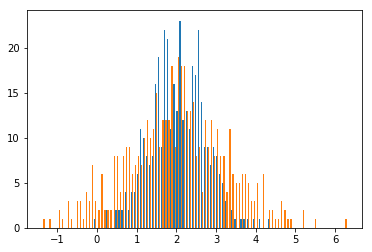

In [4]:
%matplotlib inline

import math
import matplotlib.pylab as plt
plt.hist((c1, c2), 100)

# Znalezienie parametrów statystycznych określonych w zadaniu
## Funkcje pomocnicze:

### Średnia arytmetyczna

In [5]:
def mean(array):
    res = sum(array) / len(array)
    return round(res, 3)

### Odchylenie standardowe

In [6]:
def standard_deviation(array):
    m = mean(array)
    return round(math.sqrt(sum((i - m) ** 2 for i in array) / (len(array) - 1)), 3)

### Znormalizowana różnica średnich

In [7]:
def computeZ(arr1, arr2):
    mean_1 = mean(arr1)
    mean_2 = mean(arr2)
    stdev_1 = standard_deviation(arr1)
    stdev_2 = standard_deviation(arr2)
    z = (mean_1 - mean_2) \
      / math.sqrt(stdev_1 / len(arr1) + stdev_2 / len(arr2))
    
    return round(z, 3)

### Liczba stopni swobody

In [8]:
def computeDF(arr1, arr2):
    s1 = standard_deviation(arr1)
    s2 = standard_deviation(arr2)
    
    s1_squared = (s1 ** 2)
    s2_squared = (s2 ** 2)
    n1 = len(arr1)
    n2 = len(arr2)

    DF = (s1_squared / n1 + s2_squared / n2) ** 2 \
       / (( (s1_squared / n1) ** 2 / (n1 - 1)) \
       + (  (s2_squared / n2) ** 2 / (n2 - 1)))

    return round(DF, 3)

## Obliczenia:

### średnia i odchylenie standardowe

In [9]:
mean_c1, mean_c2 = mean(c1), mean(c2)
stdev_c1, stdev_c2 = standard_deviation(c1), standard_deviation(c2)

### Znormalizowana róznica średnich oraz ilość stopni swobody

In [10]:
z = computeZ(c1, c2)
df = computeDF(c1, c2)

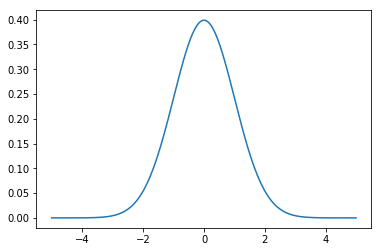

In [11]:
def normal(X):
    return (math.e**( (-X*X) / 2) ) / math.sqrt(math.pi*2)

normal_x = [-5 + i * 0.01 for i in range(1000)]
normal_y = [normal(x) for x in normal_x]

plt.figure()
plt.plot(normal_x, normal_y)

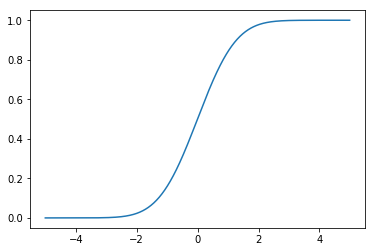

In [12]:
dist_y = [0]
for y in normal_y:
    dist_y.append(dist_y[-1] + y*0.01)

dist_y = dist_y[1:]

plt.figure()
plt.plot(normal_x, dist_y)

In [13]:
def find_dist(X):
    for i in range(len(normal_x)):
        if normal_x[i] > X:
            return dist_y[i]
    return 1

find_dist(-abs(z))*2

0.46844961862437157

# Prezentacja wyników przetwarzania danych i wnioski

In [14]:
print("1st sample size = " + str(len(c1)))
print("2nd sample size = " + str(len(c2)))

print("1st sample mean = " + str(mean_c1))
print("2nd sample mean = " + str(mean_c2))
print("1st sample stdev = " + str(stdev_c1))
print("2nd sample stdev = " + str(stdev_c2))
print("Degrees of freedom for Student-t distribution = " + str(df))

print("\nResults:")

print("Statistics value z = " + str(z))
print("Normal distribution: p-value = " + str( (find_dist(-abs(z)) * 2) ))

1st sample size = 395
2nd sample size = 517
1st sample mean = 2.044
2nd sample mean = 1.997
1st sample stdev = 0.686
2nd sample stdev = 1.236
Degrees of freedom for Student-t distribution = 837.639

Results:
Statistics value z = 0.732
Normal distribution: p-value = 0.46844961862437157


Wartość prawdopodobieństwa odczytana na podstawie tablicy rozkładu normalnego jest znacząco większa niż zadany stopień prawdopodobieństwa alfa. Właściwą wartość prawdopodobieństwa można odnaleźć następującą metodą:

In [15]:
real_p = find_dist(-abs(z))
print("Real p: " + str(real_p))

Real p: 0.23422480931218578
